In [1]:
#import nba_api as nb
import numpy as np
import pandas as pd
import scipy as sp
import math

In [ ]:
from nba_api.stats.endpoints import playercareerstats as pcs
from nba_api.stats.endpoints import boxscoreadvancedv2 as adv
# Anthony Davis
#career = pcs.PlayerCareerStats(player_ID="203076")
#career.get_data_frames()[0]

In [ ]:
from nba_api.stats.static import players

# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
#print("Number of players fetched: {}".format(len(nba_players)))
#nba_players[:5]

In [ ]:
players = []
i = 0
for player in nba_players:
    ID = player["ID"]
    career = pcs.PlayerCareerStats(player_id=ID)
    players.append(career.get_data_frames()[0])
    i = i + 1

In [ ]:
#Makes a list of seasons by year

years = []
season = "1983"+"-84"
#years.append('Name')
while int(season[:4]) < 2024:
    years.append(season)
    year1 = int(season[:4])+1
    year2 = int(season[5:7])+1
    if year2 == 100:
        year2 = 0
        season = str(str(year1) + '-' + str(year2) + str(year2))
    if year2 < 10:
        season = str(str(year1) + '-' + '0' + str(year2))
    elif year2 != 100:
        season = str(str(year1) + str(-year2))

In [ ]:
#Makes a DF of points/game each year for each player

temp = 0
ppg_df = pd.DataFrame(columns=years)
j = 0
ID = []
for player in players:
    i = 0
    for year in player["SEASON_ID"]:
        if int(year[0:4]) == 2024:
            p = 1
        elif int(year[0:4]) >= 1983:
            if temp == year:
                temp = year
                ppg_df.at[j, temp] = [player["PTS"][i]/player["GP"][i],player["PLAYER_ID"][0]]
                i = i + 1     
            elif temp != year:
                temp = year
                ppg_df.at[j, year] = [player["PTS"][i]/player["GP"][i],player["PLAYER_id"][0]]
                i = i + 1
        elif int(year[0:4]) < 1983:
            if temp == year:
                temp = year
                i = i + 1
            elif temp != year:
                temp = year
                i = i + 1
    if int(temp[0:4]) >= 1983:
        j = j + 1 
    if not player.empty:
        ID.append(player["PLAYER_ID"][0])

In [ ]:
#Applies each players PPG to a year
columns = list(ppg_df)

In [ ]:
#Finds and stores the index of top 40 scorers that season

avg_pts_index = []
for column in columns:
    i = 0
    if column == 'Name':
        i = 1
    elif column != 'Name':
        a = ppg_df.sort_values(by=[column], ascending=False)
        temp1 = []
        for values in a[column]:
            i = i + 1
            temp1.append(values[1])
            if i == 40:
                break
            #row_number = a.index[a[column] == values]
            #temp.append(row_number)
            #print(temp1)
        avg_pts_index.append(temp1)

In [ ]:
#Restructures indecis of highest averages to make more sense
i = 0
avg = []
while i < len(avg_pts_index):
    temp = []
    j = 0
    while j < 40:
        temp.append(avg_pts_index[i][j])
        j = j + 1
    i = i + 1
    avg.append(temp)

In [ ]:
#Stores all player data

# open file
with open('nba.txt', 'w+') as f:
    
    # write elements of list
    for items in players:
        f.write('%s\n' %items)
    
    print("File written successfully")


# close the file
f.close()

In [ ]:
#Points per Possession for each Season

ppp = [1.8,1.8,1.8,1.9,1.8,1.8,1.9,1.8,1.9,1.9,1.7,1.9,1.8,1.7,1.6,1.3,1.5,1.4,1.5,1.4,1.4,1.7,1.7,1.7,1.8,1.9,1.8,1.8,1.5,1.7,1.7,1.6,1.7,1.9,1.9,1.11,1.11,1.13,1.13,1.16,1.16]

In [ ]:
#Finds, reads, and neatly stores all necessary player data into a DF, accounting for several errors

temp = 0
df = pd.DataFrame(columns=years)
j = 0
for player in players:
    i = 0
    temp2 = '0000'
    temp1 = '0000'
    for year in player["SEASON_ID"]:
        if int(year[0:4]) >= 1983:
            if int(year[0:4]) == 2024:
                a = 0
            elif temp2 == year:
                temp2 = year
                minutes = player["MIN"][i]
                two_point_fieldgoals = (player["FGA"][i] - player["FG3A"][i])/minutes
                two_point_percentage = (player["FGM"][i]-player["FG3M"][i])/minutes/two_point_fieldgoals
                offensive_rebounds = (player["OREB"][i])/minutes
                defensive_rebounds = (player["DREB"][i])/minutes
                free_throws = (player["FTA"][i])/minutes
                free_throw_percentage = (player["FT_PCT"][i])
                three_point_fieldgoals = (player["FG3A"][i])/minutes
                three_point_percentage = (player["FG3_PCT"][i])
                blocks = (player["BLK"][i])/minutes
                steals = (player["STL"][i])/minutes
                turnovers = (player["TOV"][i])/minutes
                assists = (player["AST"][i])/minutes
                personal_fouls = (player["PF"][i])/minutes
                player_id = player["PLAYER_ID"][i]
                temp1 = year
                df.at[j, temp2] = [two_point_fieldgoals,two_point_percentage,offensive_rebounds,defensive_rebounds,free_throws,free_throw_percentage,three_point_fieldgoals,three_point_percentage,blocks,steals,turnovers,assists,personal_fouls,player_id,minutes]
                i = i + 1
            elif temp1 == year:
                temp1 = year
                minutes = player["MIN"][i]
                two_point_fieldgoals = (player["FGA"][i] - player["FG3A"][i])/minutes
                two_point_percentage = (player["FGM"][i]-player["FG3M"][i])/minutes/two_point_fieldgoals
                offensive_rebounds = (player["OREB"][i])/minutes
                defensive_rebounds = (player["DREB"][i])/minutes
                free_throws = (player["FTA"][i])/minutes
                free_throw_percentage = (player["FT_PCT"][i])
                three_point_fieldgoals = (player["FG3A"][i])/minutes
                three_point_percentage = (player["FG3_PCT"][i])
                blocks = (player["BLK"][i])/minutes
                steals = (player["STL"][i])/minutes
                turnovers = (player["TOV"][i])/minutes
                assists = (player["AST"][i])/minutes
                personal_fouls = (player["PF"][i])/minutes
                player_id = player['PLAYER_ID'][i]
                temp1 = year
                temp2 = temp1
                df.at[j, temp1] = [two_point_fieldgoals,two_point_percentage,offensive_rebounds,defensive_rebounds,free_throws,free_throw_percentage,three_point_fieldgoals,three_point_percentage,blocks,steals,turnovers,assists,personal_fouls,player_id,minutes]
                i = i + 1     
            elif temp1 != year:
                minutes = player["MIN"][i]
                TwoFG = (player["FGA"][i] - player["FG3A"][i])/minutes
                two_point_percentage = (player["FGM"][i]-player["FG3M"][i])/minutes/two_point_fieldgoals
                offensive_rebounds = (player["OREB"][i])/minutes
                defensive_rebounds = (player["DREB"][i])/minutes
                free_throws = (player["FTA"][i])/minutes
                free_throw_percentage = (player["FT_PCT"][i])
                three_point_fieldgoals = (player["FG3A"][i])/minutes
                three_point_percentage = (player["FG3_PCT"][i])
                blocks = (player["BLK"][i])/minutes
                steals = (player["STL"][i])/minutes
                turnovers = (player["TOV"][i])/minutes
                assists = (player["AST"][i])/minutes
                personal_fouls = (player["PF"][i])/minutes
                player_id = player['PLAYER_ID'][i]
                temp1 = year
                df.at[j, temp1] = [two_point_fieldgoals,two_point_percentage,offensive_rebounds,defensive_rebounds,free_throws,free_throw_percentage,three_point_fieldgoals,three_point_percentage,blocks,steals,turnovers,assists,personal_fouls,player_id,minutes]
                i = i + 1
        elif int(year[0:4]) < 1983:
            if int(year[0:4]) == 2024:
                a = 0
            elif temp1 == year:
                temp1 = year
                i = i + 1
            elif temp1 != year:
                temp1 = year
                i = i + 1
    if int(temp1[0:4]) >= 1983:
        j = j + 1

In [ ]:
#Finds Averages per season of a few important stats

columns = list(df)
avg = []
metric_adjustment = []
k = 0

for column in columns:
    temp = []
    j = 0
    two_point_sum = 0
    three_point_sum = 0
    free_throw_sum = 0
    personal_foul_sum = 0
    [two_point_fieldgoals,two_point_percentage,offensive_rebounds,defensive_rebounds,free_throws,free_throw_percentage,three_point_fieldgoals,three_point_percentage,blocks,steals,turnovers,assists,personal_fouls,player_id]
    while j < 15:
        i = 0
        s = 0
        n = 0
        while i < 1876:
            #print(i)
            if type(df[column][i]) == list:
                if df[column][i][j] is None:
                    if (df[column][i][13] in avg_pts_index[k]) == False:
                        #print(type(df[column][i][j]))
                        #print(i)
                        #print(j)
                        n = n + 1
                elif df[column][i][j] is not None:
                    if math.isnan(df[column][i][j]) == True:
                        p = 0
                    elif math.isnan(df[column][i][j]) == False:
                        if df[column][i][14] > 100:
                            if (df[column][i][13] in avg_pts_index[k]) == False:
                            #print(type(df[column][i][j]))
                                if j == 0:
                                    two_point_sum = two_point_sum + df[column][i][j]
                                if j == 6:
                                    three_point_sum = three_point_sum + df[column][i][j]
                                if j == 4:
                                    free_throw_sum = free_throw_sum + df[column][i][j]
                                if j == 12:
                                    personal_foul_sum = personal_foul_sum + df[column][i][j]                               
                                n = n + 1
                                s = s + df[column][i][j]
            i = i + 1
        temp.append(s/n)
        j = j + 1
    avg.append(temp)
    metric_adjustment.append([two_point_sum*2/(three_point_sum*3+two_point_sum*2)*2 + three_point_sum*3/(three_point_sum*3+two_point_sum*2)*3,free_throw_sum/personal_foul_sum*avg[k][5],ppp[k]])
    k = k + 1
    

In [ ]:
# Calculates the metric for all players with more than 100 minutes

i = 0
player_performance_metric = []
for year in df:
    for player in df[year]:
        temp = 0
        if type(player) != list:
            a = 1;
        if type(player) == list:
            if player[14] > 100:
                two_point_fieldgoals = player[0]/avg[i][0]
                two_point_percentage = player[1]/avg[i][1]
                offensive_rebounds = player[2]/avg[i][2]
                defensive_rebounds = player[3]/avg[i][3]
                free_throws = player[4]/avg[i][4]
                if player[5] is not None:
                    free_throw_percentage = player[5]/avg[i][5]
                if player[5] is None:
                    free_throw_percentage = 0
                three_point_fieldgoals = player[6]/avg[i][6]
                if player[7] is not None:
                    three_point_percentage = player[7]/avg[i][7]
                    if math.isnan(three_point_percentage):
                        three_point_percentage = 0
                if player[7] is None:
                    three_point_percentage = 0
                blocks = player[8]/avg[i][8]
                steals = player[9]/avg[i][9]
                turnovers = player[10]/avg[i][10]
                assists = player[11]/avg[i][11]
                personal_fouls = player[12]/avg[i][12]
                player_id = player[13]
                MET = ((TwoFG*two_point_percentage+blocks/2)*2+three_point_fieldgoals*three_point_percentage*3+(FT*free_throw_percentage-PF*(metric_adjustment[i][1])))+assists*0.6*(metric_adjustment[i][0])
                +(steals-turnovers+offensive_rebounds+defensive_rebounds/2)*(metric_adjustment[i][2])
                if math.isnan(MET) == True:
                    print(three_point_percentage)
                k = 0
                for player_ids in player_performance_metric:
                    if player_id == player_ids[0][1]:
                        temp = 1
                        break;
                    k = k + 1     
                if temp == 0:
                    player_performance_metric.append([[MET,player_id]])
                elif temp == 1:
                    player_performance_metric[k].append([MET,player_id])
    i = i + 1

In [ ]:
#Creates a list of player IDs and reformats the metric to not include ID

i = 0
ID = []
for player in player_performance_metric:
    j = 0
    ID.append(str(player_performance_metric[i][j][1]))
    for year in player: 
        player_performance_metric[i][j] = player_performance_metric[i][j][0]
        j = j + 1
    i = i + 1

In [ ]:
# Pads the metric for processing
max_length = max([np.array(player_performance_metric[i]).shape[0] for i in range(len(player_performance_metric))])

# Pad the time series to the same length
X_padded = []
for i in range(len(player_performance_metric)):
    padded = np.pad(player_performance_metric[i], ((0, max_length - np.array(player_performance_metric[i]).shape[0])), 'constant')
    X_padded.append(padded)
X_padded = np.array(X_padded)
player_performance_metric = X_padded.tolist()

In [ ]:
# Saves the padded metric as a dataframe
df2 = pd.DataFrame(np.array(player_performance_metric).transpose(),
                   columns=ID)
df2.to_csv('player_performance_metric.csv', index=False)

In [2]:
# Imports metric dataframe if already calculated
import pandas as pd
import numpy as np
df = pd.read_csv('player_performance_metric.csv')
player_performance_metric = []
for i in df:
    player_performance_metric.append(df[i].values)

In [3]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


KeyboardInterrupt



In [4]:
# Adds a different metric list that includes the year each player has been in the league
player_performance_metric = []
player_performance_year = []
for player in df:
    temp = []
    temp2 = []
    j = 0
    for year in df[player]:
        temp.append(year)
        temp2.append(j)
        j = j + 1
    player_performance_metric.append(temp)
    player_performance_year.append(temp2)
player_performance_metric = np.array(player_performance_metric).reshape(2818,22,1)

In [6]:
# Cleans up the metric slightly
j = 0
player_performance_metric_adjusted = []
for player in player_performance_metric:
    i = 0
    temp = []
    for year in player:
        #print(player_performance_metric[j][i][0])
        temp.append([player_performance_metric[j][i][0],player_performance_year[j][i]+1])
        i = i + 1
    player_performance_metric_adjusted.append(temp)
    j = j + 1

In [8]:
#changes year 22 to be 0 to make scaling not go to 0
#the 1 datapoint of a player playing in year 22 is not that important
i = 0
for player in player_performance_metric_adjusted:
    j = 0
    for year in player:
        if year[1] == 22:
            #player_performance_metric_adjusted[i][j][1] = 0
            a = 1
        j = j + 1
    i = i + 1

In [10]:
#cleaning up and scaling

player_performance_scaled = []
i = 0
while i < len(player_performance_metric_adjusted):
    player_performance_scaled.append(player_performance_metric_adjusted[i][0:22])
    i = i + 1
#Scaling data and accounting for error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
player_performance_scaled = np.array(player_performance_scaled).reshape(-1,2).tolist()
scaler = scaler.fit(player_performance_scaled)
normalized = scaler.transform(player_performance_scaled)
player_performance_scaled = normalized

In [12]:
#Separating into X (input) and Y (target) data
#Here Y is set to be a year after X so that I can predict the next year based on the current year
X = []
Y = []
i = 0
while i < len(player_performance_scaled):
    X.append(player_performance_scaled[i:i+20])
    Y.append(player_performance_scaled[i+1:i+21])
    i = i + 22

In [14]:
#Scaling data and accounting for error
X = np.array(X).reshape(-1,2).tolist()
Y = np.array(Y).reshape(-1,2).tolist()

In [15]:
#The last year in a players' career currently teaches the model that 
#eventually the metric decays to 0
#I want growth
i = 0
while i < len(X):
    if X[i][0] != 0 and Y[i][0] == 0:
        X[i][0] = 0
    i = i + 1

In [16]:
i = 0
for player in Y:
    j = 0
    for year in player:
        if math.isnan(year) == True:
            Y[i][j] = 0
        if Y[i][j] == 0 and 0 != X[i][j]:
            print(i)
            print(j)
            X[i][j] = 0
        j = j + 1
    i = i + 1
i = 0
for player in X:
    j = 0
    for year in player:
        if math.isnan(year) == True:
            X[i][j] = 0
        j = j + 1
    i = i + 1

38101
0


Deep Learning Implementation

When I started this project, I started it with deep learning in mind. After nearly completing this portion, I learned that this type of problem is more commonly solved with standard regressions. This portion covers my deep learning approach. I believe this appraoch still works, but as you can see later, a simple regression is able to come to very similar conclusions (according to R^2) with much less time and resources required. 

In [21]:
#Split data
from sklearn.model_selection import train_test_split

#Create dataset without 0's
Ys = []
Xs = []
for i in Y:
    if i[0] != 0:
        Ys.append([[i[0]]])
for i in X:
    if i[0] != 0:
        Xs.append(i)

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, test_size=0.3,shuffle=False)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [22]:
# Prepare the model
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import regularizers

In [25]:
#Alternate model preparation
tf.keras.utils.set_random_seed(2)
model = keras.Sequential()
model.add(keras.layers.Input(shape=(2, 1)))
#model.add(keras.layers.LSTM(256))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,kernel_regularizer=regularizers.l1(0.000001)))
model.add(keras.layers.LeakyReLU(negative_slope=0.05))
model.add(keras.layers.Dense(128,kernel_regularizer=regularizers.l1(0.000001)))
model.add(keras.layers.LeakyReLU(negative_slope=0.05))
model.add(keras.layers.Dense(1,kernel_regularizer=regularizers.l1(0.000001)))
model.add(keras.layers.LeakyReLU(negative_slope=0.05))
#model.add(keras.layers.Dropout(0.4))
#model.add(keras.layers.Dense(64, activation="relu"))
#model.add(keras.layers.Dropout(0.4))
#model.add(keras.layers.Dense(5, activation="softmax"))

In [27]:
# Run the NN
my_adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=my_adam_optimizer, loss='mean_absolute_error')
model.fit(X_train, Y_train, epochs=20, batch_size=20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0305
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0261
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0257
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0254
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0252
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0251
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0248
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0249
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0246
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0244
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0244
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0243
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0243
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0242
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [28]:
# Check results
results = model.evaluate(X_test, Y_test, batch_size=20)

201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155


In [29]:
# Predict for testing dataset
predicts_test = model.predict(X_test)
predicts_train = model.predict(X_train)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
# Prepare data to calculate R^2
r2_data = []
r2_test = []
j = 0
for i in predicts_test:
    r2_data.append(i[0])
    r2_test.append(Y_test[j][0])
    j = j + 1

In [31]:
r2_data_train = []
r2_train = []
j = 0
for i in predicts_train:
    r2_data_train.append(i[0])
    r2_train.append(Y_train[j][0])
    j = j + 1

In [32]:
#Calculate R^2
import sklearn
print(sklearn.metrics.r2_score(r2_test, r2_data))
print(sklearn.metrics.r2_score(r2_train, r2_data_train))

0.6495072092381516
0.6774259813097461


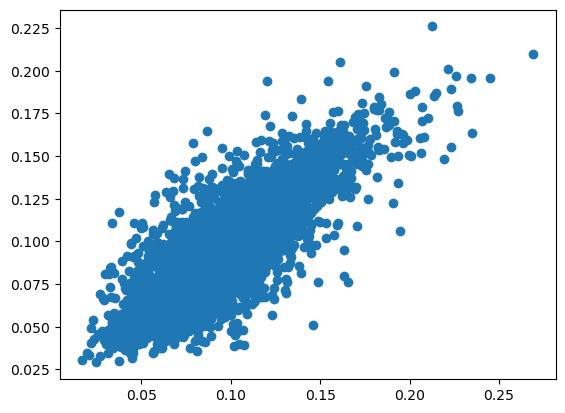

In [35]:
from matplotlib import pyplot as plt
plt.scatter(r2_test,r2_data)

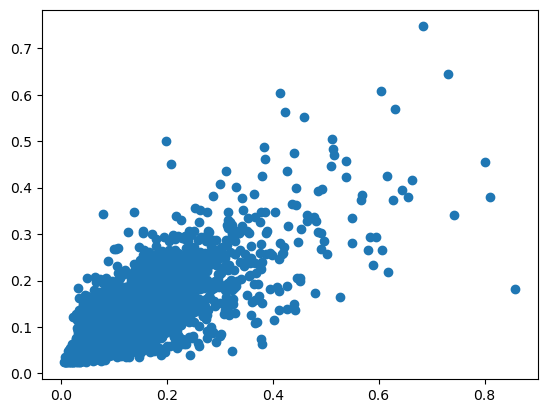

In [37]:
plt.scatter(r2_train,r2_data_train)

In [39]:
#Sanity checks can be done here
Y_test[30]

array([[0.08096458]])

In [43]:
#More sanity checks
model.predict(np.array([X_test[30]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.10362418]], dtype=float32)

Decision Tree Regression

I know ahead of time that each player's data will have vastly different shapes, so I linear/polynomial/exponential regressions won't do much good.
I could do something more complicated like giving each player different order polynomials, but I believe a decision tree regression is the most simple solution

Implementation of the decision tree is extremely simple - the one issue is that overfitting will almost certainly happen by default. Unlike previously, the decision tree overfitting on the training data made it unable to recognize the fitting data. To remedy this, minimum samples and maximum depth can be tunes

We do have to process the data differently - due to dimensional limits of the regressor, I can no longer include the year the player has been in the league, data that was crucial for deep learning. Furthermore, a good chunk of the R^2 diminishes since the regressor will predict a value other than 0 for the players most recently played season. To accurately show R^2, this is fixed before the calculation. I would un-pad the data beforehand, but to keep context for the regressor from going inbetween players, I have to keep those arrays separated in model fitting.

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
#Separating into X (input) and Y (target) data
#Here Y is set to be a year after X so that I can predict the next year based on the current year
X = []
Y = []
i = 0
while i < len(player_performance_scaled):
    X.append(player_performance_scaled[i:i+20])
    Y.append(player_performance_scaled[i+1:i+21])
    i = i + 22

In [61]:
# Restructure data to fit a decision tree rather than a NN
x = []
y = []
i = 0
while i < len(X):
    j = 0
    temp = []
    temp2 = []
    while j < 20:
        temp.append(X[i][j][0])
        temp2.append(Y[i][j][0])
        j = j + 1
    i = i + 1
    x.append(temp)
    y.append(temp2)

In [62]:
#Remove NaN
i = 0
for player in y:
    j = 0
    for year in player:
        if math.isnan(year) == True:
            y[i][j] = 0
        j = j + 1
    i = i + 1
i = 0
for player in x:
    j = 0
    for year in player:
        if math.isnan(year) == True:
            x[i][j] = 0
        j = j + 1
    i = i + 1

In [63]:
#The last year in a players' career currently teaches the model that 
#eventually the metric decays to 0
#I want growth
i = 0
while i < len(x):
    j = 0
    while j < len(x[0]):
        if x[i][j] != 0 and y[i][j] == 0:
            x[i][j] = 0
        j = j + 1
    i = i + 1

In [64]:
x_1 = []
y_1 = []
i = 0
while i < len(x):
    j = 0
    while j < len(x[0]):
        if x[i][j] == 0:
            a = 1
        if x[i][j] != 0:
            x_1.append([x[i][j],j])
            y_1.append(y[i][j])
        j = j + 1
    i = i + 1

In [65]:
#Set up training and testing datasets
y = np.array(y).flatten()
X_train, X_test, Y_train, Y_test = train_test_split(x_1, y_1, test_size=0.3,shuffle=False)

In [287]:
#Create the regressor
regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf=17, max_depth=3)  

# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(max_depth=3, min_samples_leaf=17, random_state=0)

In [288]:
# Create two predictions, one to check fitting on training data and one for testing data
from sklearn.metrics import mean_squared_error as MSE
predicts_train = regressor.predict(X_train)
predicts_test = regressor.predict(X_test)

In [289]:
#Error Analysis between test and train datasets
print(MSE(Y_test, predicts_test))
print(MSE(Y_train, predicts_train))
print(sklearn.metrics.r2_score(Y_train, predicts_train))
print(sklearn.metrics.r2_score(Y_test, predicts_test))

0.0004624632669625055
0.0016607742172230265
0.6635539138620978
0.554018410402451


In [290]:
import matplotlib.pyplot as plt

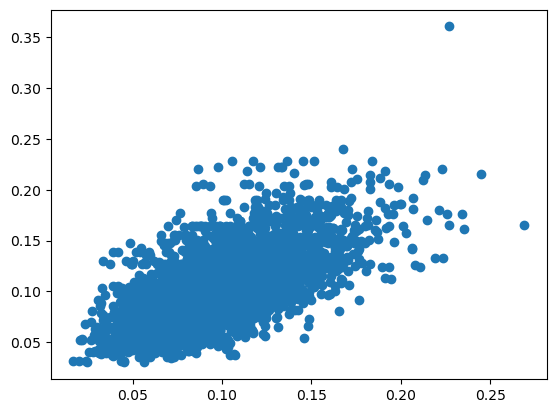

In [282]:
#Visualize results
plt.scatter(Y_test,predicts_test)

In [178]:
#Sanity checks can be done here
Y_test[30]

0.08096457825391638

In [179]:
#More sanity checks
model.predict(np.array([X_test[30]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.04723741]], dtype=float32)

XGBoost Method

In [295]:
#import libraries
from sklearn.ensemble import GradientBoostingRegressor
import sklearn

In [297]:
#set parameters
params = {
    "n_estimators": 2000,
    "max_depth": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 1.0,
}

In [298]:
#Build test and train data
X_train, X_test, Y_train, Y_test = train_test_split(x_1, y_1, test_size=0.3,shuffle=False)

In [299]:
#Make regressor
regressor = GradientBoostingRegressor(**params)
#Y_train = np.array(Y_train).flatten()
#X_train = np.array(X_train).flatten()
regressor.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=5, n_estimators=2000)

In [300]:
# Create two predictions, one to check fitting on training data and one for testing data
from sklearn.metrics import mean_squared_error as MSE
predicts_train = regressor.predict(X_train)
predicts_test = regressor.predict(X_test)

In [301]:
#Print error
print(MSE(Y_test, predicts_test))
print(MSE(Y_train, predicts_train))
print(sklearn.metrics.r2_score(Y_train, predicts_train))
print(sklearn.metrics.r2_score(Y_test, predicts_test))

0.00039158112924540003
0.001456970812203695
0.7048411985810198
0.6223743874312386


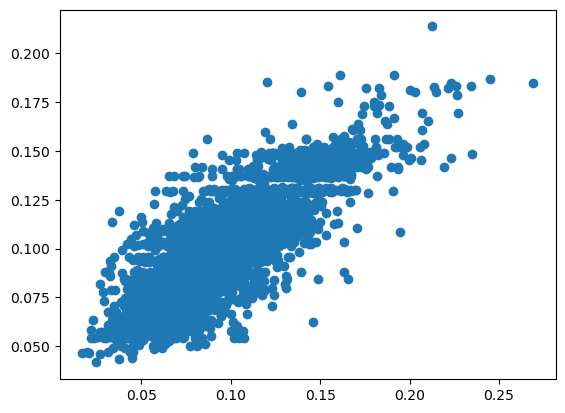

In [302]:
#View test dataset
from matplotlib import pyplot as plt
plt.scatter(Y_test,predicts_test)

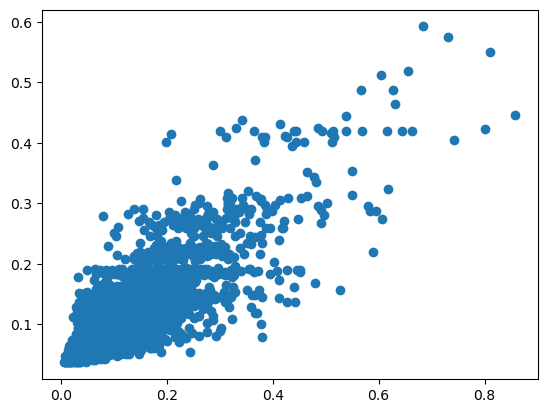

In [303]:
#View train dataset
plt.scatter(Y_train,predicts_train)

In [304]:
#Sanity checks can be done here
Y_test[30]

0.08096457825391638

In [305]:
#More sanity checks
model.predict(np.array([X_test[30]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.04723741]], dtype=float32)

In [306]:
#Make a method so I can average over multiple seeds
def boost_regression(X, Y, seed):
    regressor = GradientBoostingRegressor(**params, random_state=seed)
    #Y_train = np.array(Y_train).flatten()
    #X_train = np.array(X_train).flatten()
    regressor.fit(X_train, Y_train)
    predicts_train = regressor.predict(X_train)
    predicts_test = regressor.predict(X_test)
    return(predicts_test, predicts_train)

In [307]:
#Get models for multiple seeds
a = boost_regression(X_train,Y_train,1)[0]
b = boost_regression(X_train,Y_train,100)[0]
c = boost_regression(X_train,Y_train,1000)[0]

In [308]:
#Compute average
d = (a+b+c)/3

In [309]:
#Show error
print(MSE(Y_test, d))
print(sklearn.metrics.r2_score(Y_test, d))

0.0003915808835715718
0.6223746243495244
